<a href="https://colab.research.google.com/github/dmitriygorlov/Yandex.Practikum_Data_Science/blob/main/Module-01_04-Common-project/project-4_videogames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

**Главная задача:** ***Выявить параметры успешности игры, принципы для планирования рекламных кампаний***

# План проекта
- Первичное прочтение данных
  - Загрузка библиотек и данных;
  - Первый взгляд на данные.
- Подготовка данных (предобработка)
  - Унификация названий; 
  - Обработка пропусков и смена типов данных; 
  - Добавление новых столбцов.
+ Исследовательский анализ данных
  - Анализ выпуска игр по годам;
  - Анализ динамики продаж (жизненного цикла) по платформам;
  - Срез данных за актуальный период;
  - Анализ прибыльности платформ, их динамики;
  - "Ящик с усами" по глобальным продажам в разбивке по платформам;
  - Анализ корреляции отзывов и продаж в рамках одной платформы;
  - Анализ корреляции с другими платформами;
  - Анализ распределения игр по жанрам, прибыльности по жанрам.
+ Портреты пользователей каждого региона
  - Самые популярные платформы (топ-5);
  - Самые популярные жанры (топ-5);
  - Анализ влияния ESRB на продажи
+ Проверка гипотез
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action и Sports разные.
+ Общий вывод

## Первичное прочтение  данных

Путь к файлу: /datasets/games.csv.

Описание переменных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

### Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Импортировали библиотеки и таблицу. 

### Первый взгляд на данные

In [2]:
data.info()

display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Таблица сравнительно небольших размеров, с небольшим количеством столбцов. На первый взгляд нужно обработать пропуски, поработать с типами данных.

## Подготовка данных (предобработка)

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Унификация названий; 

In [3]:
print(data.columns)
data.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis = 1, inplace = True)
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Для дальнейшего удобства привели названия всех столбцов к одному виду (только маленькие буквы)

### Обработка пропусков и смена типов данных; 

In [4]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       name platform  ...  user_score rating
0                Wii Sports      Wii  ...           8      E
1         Super Mario Bros.      NES  ...         NaN    NaN
2            Mario Kart Wii      Wii  ...         8.3     

На текущий момент можно видеть о следующих сложностях:
- 2 пустых строки в name
- Пустые строки и смена типа в year_of_release
- 2 пустых строки в genre
- Пустые строки и возможная смена данных в critic_score       
- Пустые строки и возможная смена данных в user_score
- Пустые строки в rating

In [5]:
print(data[data['name'].isna()])
print('строк:', len(data))
data.dropna(subset = ['name'], inplace = True)
print('строк:', len(data))

      name platform  year_of_release  ... critic_score  user_score  rating
659    NaN      GEN           1993.0  ...          NaN         NaN     NaN
14244  NaN      GEN           1993.0  ...          NaN         NaN     NaN

[2 rows x 11 columns]
строк: 16715
строк: 16713


Пустые строки оказались странными и малозначительными (по продажам и всего лишь две строки) данными. Удалим их

In [6]:
print(data[data['year_of_release'].isnull()].head())
print()
print('Процент пустых значений в year_of_release: {:.2%}'.format(data['year_of_release'].isnull().sum()/len(data)))

data.dropna(subset = ['year_of_release'], inplace = True)

print('Процент пустых значений в year_of_release после корректировки: {:.2%}'.format(data['year_of_release'].isnull().sum()/len(data)))

data['year_of_release'] = data['year_of_release'].astype('int')

                           name platform  ...  user_score rating
183             Madden NFL 2004      PS2  ...         8.5      E
377            FIFA Soccer 2004      PS2  ...         6.4      E
456  LEGO Batman: The Videogame      Wii  ...         7.9   E10+
475  wwe Smackdown vs. Raw 2006      PS2  ...         NaN    NaN
609              Space Invaders     2600  ...         NaN    NaN

[5 rows x 11 columns]

Процент пустых значений в year_of_release: 1.61%
Процент пустых значений в year_of_release после корректировки: 0.00%


Пустые данные в годах вероятно вызваны ошибкой, потому что игры в них реальны (у некоторых указан год в имени, но нет четкой закономерности). Учитывая малое количество значений и необходимость в дальнейшем считать всё с учётом годов, удалим эти значения. Также сменим тип данных на целочисленный.

In [7]:
print('Количество пустых значений в genre: {:.2%}'.format(data['genre'].isna().sum() / len(data)))

Количество пустых значений в genre: 0.00%


Пустые значения в genre были удалены вместе с пустыми значениями по name, поэтому обработка не нужна

In [8]:
print(data[data['critic_score'].isnull()].head())
print()
print('Процент пустых значений в critic_score: {:.2%}'.format(data['critic_score'].isna().sum() / len(data)))

data['critic_score'] = data['critic_score'].fillna(value=0)

print('Процент пустых значений в critic_score после корректировки: {:.2%}'.format(data['critic_score'].isna().sum() / len(data)))

data['critic_score'] = data['critic_score'].astype('int')

                        name platform  ...  user_score rating
1          Super Mario Bros.      NES  ...         NaN    NaN
4   Pokemon Red/Pokemon Blue       GB  ...         NaN    NaN
5                     Tetris       GB  ...         NaN    NaN
9                  Duck Hunt      NES  ...         NaN    NaN
10                Nintendogs       DS  ...         NaN    NaN

[5 rows x 11 columns]

Процент пустых значений в critic_score: 51.45%
Процент пустых значений в critic_score после корректировки: 0.00%


В половине строк отсутствуют оценки критиков - это большая часть данных. Вероятно ошибка вызвана тем, что критики оценивают не все игры. Заполним нулями, чтобы не учитывать при аналитике оценки критиков, но использовать данные в других вычислениях. Также сменим тип на целочисленный (балльная оценнка не потеряет в точности значений)

In [9]:
print(data[data['user_score'].isnull()].head())
print()
print('Процент пустых значений в user_score: {:.2%}'.format(data['user_score'].isna().sum() / len(data)))

print()
data['user_score'] = data['user_score'].fillna(value=0)

print('Процент пустых значений в critic_score после корректировки: {:.2%}'.format(data['user_score'].isna().sum() / len(data)))
print()
print('Топ 5 платформ по играм всего')
print(data['platform'].value_counts().head())
print('Топ 5 платформ по играм с пустыми отзывами')
print(data[data['user_score'] == 0]['platform'].value_counts().head())

# Посмотрим на часто встречающиеся значения
print(data['user_score'].value_counts())

# Заменим значения "Ожидается" (tbd) на 100, 
data['user_score'].replace(['tbd'], ['100'], inplace = True )

data['user_score'] = data['user_score'].astype('float')

                        name platform  ...  user_score rating
1          Super Mario Bros.      NES  ...         NaN    NaN
4   Pokemon Red/Pokemon Blue       GB  ...         NaN    NaN
5                     Tetris       GB  ...         NaN    NaN
9                  Duck Hunt      NES  ...         NaN    NaN
10                Nintendogs       DS  ...         NaN    NaN

[5 rows x 11 columns]

Процент пустых значений в user_score: 40.17%

Процент пустых значений в critic_score после корректировки: 0.00%

Топ 5 платформ по играм всего
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: platform, dtype: int64
Топ 5 платформ по играм с пустыми отзывами
PS     987
DS     865
PS2    671
PSP    657
PS3    358
Name: platform, dtype: int64
0      6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.2       2
0.7       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64


В 40% строк отсутствуют данные по отзывам пользователей - это большая часть данных. Игры с пустыми отзывами есть на разных платформах, вероятно по некоторым играм просто нет данных. Заполним нулями, чтобы не учитывать при аналитике оценки пользователей, но использовать данные в других вычислениях. Значение tbd означает "Ожидает данных". Это значение по смыслу не равно отсутствующим значениям, поэтому заменим его другим значениям (также для возможности фильтрации). Чтобы перевести значение в тип float, заменим это значение на 100.

In [10]:
print(data[data['rating'].isnull()].head())
print()
print('Процент пустых значений в rating: {:.2%}'.format(data['rating'].isna().sum() / len(data)))
print()
data['rating'] = data['rating'].fillna(value='none')
print('Процент пустых значений в rating после корректировки: {:.2%}'.format(data['rating'].isna().sum() / len(data)))

print('Разбивка игр по рейтингу')
print(data['rating'].value_counts())
# Заменим значения на более понятные, а также редкие значения приведем к частым
data['rating'].replace(['E', 'T', 'M', 'E10+', 'EC', 'K-A', 'RP', 'AO'], ['Для 6+', 'Для 13+', 'Для 17+', 'Для 10+', 'Для 6+', 'Для 6+', 'RP', 'Для 17+'], inplace = True)

# Посмотрим на категорию "Ожидает оценки" 
print(data[data['rating'] == 'RP'])

# Не будем учитывать 3 значения
data = data[data['rating'] != 'RP']


                        name platform  ...  user_score rating
1          Super Mario Bros.      NES  ...         0.0    NaN
4   Pokemon Red/Pokemon Blue       GB  ...         0.0    NaN
5                     Tetris       GB  ...         0.0    NaN
9                  Duck Hunt      NES  ...         0.0    NaN
10                Nintendogs       DS  ...         0.0    NaN

[5 rows x 11 columns]

Процент пустых значений в rating: 40.60%

Процент пустых значений в rating после корректировки: 0.00%
Разбивка игр по рейтингу
none    6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64
                          name platform  ...  user_score rating
14270  Supreme Ruler: Cold War       PC  ...         6.8     RP

[1 rows x 11 columns]


В 40% строк отсутствуют данные по рейтингу ESRB - это большая часть данных. Не всем играм выставляют рейтинги. Заполним значениями none, чтобы не учитывать при аналитике рейтинга, но использовать данные в других вычислениях. Кроме того заменим значения на более понятные и заменим малочисленные на более распространенные (EC на Для 6+, K-A на Для 6+, AO на Для 17+). Данные по RP - рейтинг ожидается. Учитывая, что таких значений только 3 - уберём эти значения из данных как незначительные. 

### Добавление новых столбцов

In [11]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

print(data.head())

                       name platform  ...  rating sum_sales
0                Wii Sports      Wii  ...  Для 6+     82.54
1         Super Mario Bros.      NES  ...    none     40.24
2            Mario Kart Wii      Wii  ...  Для 6+     35.52
3         Wii Sports Resort      Wii  ...  Для 6+     32.77
4  Pokemon Red/Pokemon Blue       GB  ...    none     31.38

[5 rows x 12 columns]


Посчитали суммарные продажи в столбец sum_sales. На этом предобработка окончена, приступим к анализу

## Исследовательский анализ данных


### Анализ выпуска игр по годам

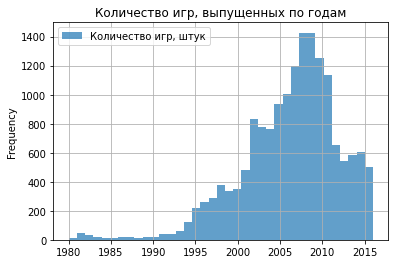

In [12]:
# print(data['year_of_release'].value_counts())

years_range = data['year_of_release'].max() - data['year_of_release'].min() + 1

data.plot(kind='hist',
    y='year_of_release',
    title = 'Количество игр, выпущенных по годам',
    range = (data['year_of_release'].min(), data['year_of_release'].max()),
    bins= years_range,
    alpha=0.7,
    label='Количество игр, штук',
    grid=True,
    legend=True
               )

Количество покупаемых игр не равномерно, видны группы : мало игр до 1994 года (меньше 100), затем "плато" от 200 до 450 по 2001 год, от 750 до 1000 с 2002 по 2006, пик количества игр с 2007 по 2011 (от 1150 до 1450), затем также "плато" c 2012 gj 2016 (от 450 до 650). Кажется, что можно отбросить игры до 1994, но стоит проверить также и продажи по ним. Наибольшее количество игр выпущено в 2008 и 2009 году.

Доля количества игр выпущенных до 1994 года: 2.2%

Доля количества продаж игр выпущенных до 1994 года: 6.6%



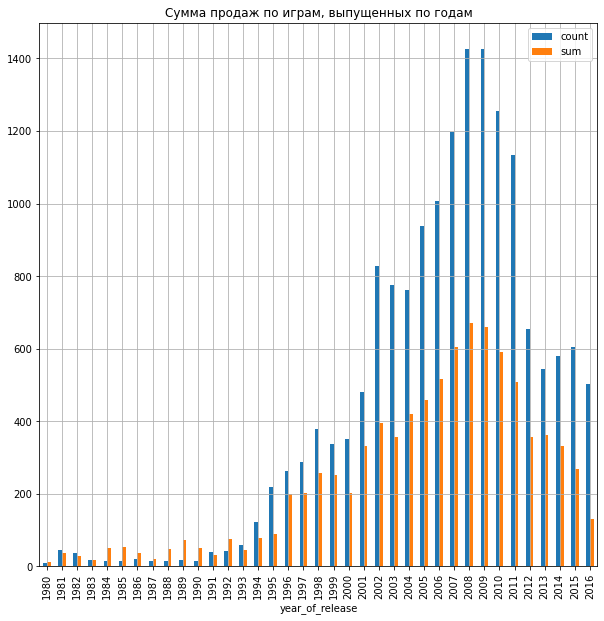

In [13]:
games_by_years = data.pivot_table (
    index = 'year_of_release', 
    values = 'sum_sales', 
    aggfunc = ('sum', 'count')
)

share_count_till_1994 = games_by_years[games_by_years.index < 1994]['count'].sum() / games_by_years['count'].sum()

share_sum_till_1994 = games_by_years[games_by_years.index < 1994]['sum'].sum() / games_by_years['sum'].sum()

print('Доля количества игр выпущенных до 1994 года: {:.1%}'.format(share_count_till_1994))
print()
print('Доля количества продаж игр выпущенных до 1994 года: {:.1%}'.format(share_sum_till_1994))
print()

games_by_years.plot(kind='bar',
    title = 'Сумма продаж по играм, выпущенных по годам',
    label='Сумма продаж, миллионов копий',
    grid=True,
    legend=True,
    figsize=(10, 10)
)
plt.show()



Распределение по продажам в целом более равномерное с меньшим всплеском 2008 и 2009 года. Например, на малое количество игр выпущенных до 1994 года (2,2%), продаж на эти игры приходится куда больше (6,6%). И всё же для расчётам возьмём возьмём нужно брать свежие данные хотя с первого всплеска в 1994. **Продажи за все годы важны, но все же значимо брать 1994 год и новее**

### Анализ динамики продаж (жизненного цикла) по платформам

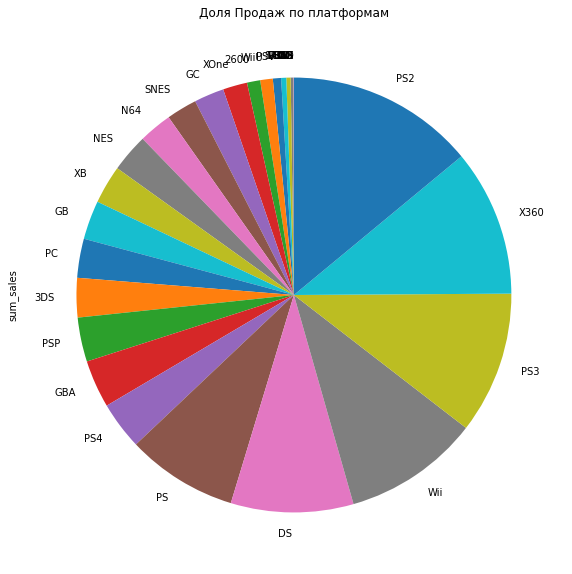

          sum_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.78
PS           727.58
PS4          314.14
GBA          312.88
PSP          289.53
3DS          257.81
PC           255.72
GB           254.43
XB           251.57
NES          251.05
N64          218.01
SNES         200.04
GC           196.73
XOne         159.32
2600          86.48
WiiU          82.19


In [14]:
games_by_platforms = data.pivot_table(
    index = 'platform',
    values = 'sum_sales',
    aggfunc = 'sum'
)

games_by_platforms.sort_values('sum_sales').plot(title = 'Доля Продаж по платформам', kind='pie', y = 'sum_sales', startangle=90, legend = False, figsize=(15,10))
plt.show()

print(games_by_platforms.sort_values('sum_sales', ascending = False).head(20))

**Топ 6 платформ за всю историю (PS2, X360, PS3, Wii, DS, PS)** занимают значительную (больше 50% продаж) с отрывом от других платформ. Дальше идут еще 12 платформ, с учетом которых охват почти 99% продаж. Отфильтруем топ платформы и посмотрим значения по годам

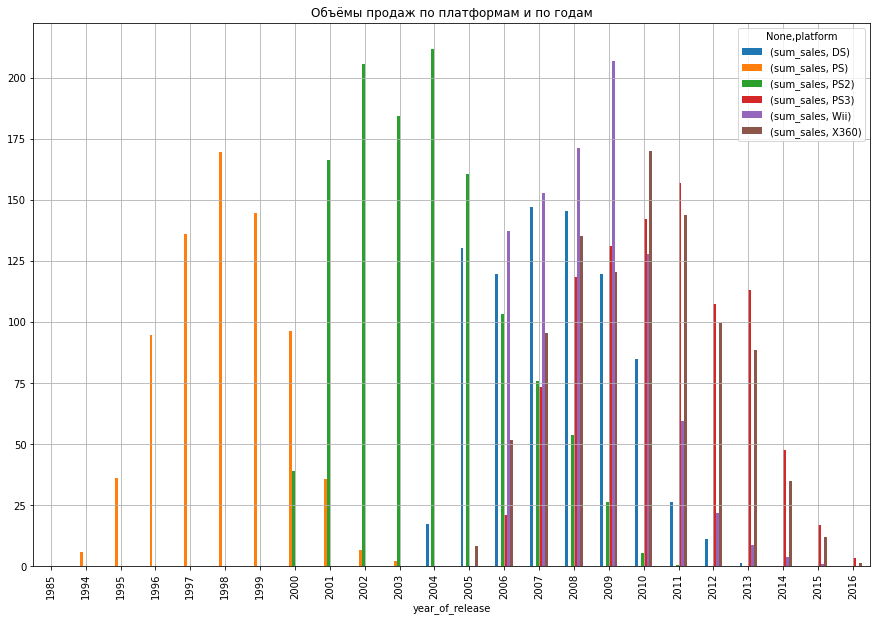

In [15]:
games_by_platforms_and_years = data.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(
    index = ['year_of_release','platform'],
    values = 'sum_sales',
    aggfunc = 'sum'
)

games_by_platforms_and_years.unstack().plot(kind='bar',
    title = 'Объёмы продаж по платформам и по годам',
    label='Сумма продаж, миллионов копий',
    grid=True,
    legend=True,
    figsize=(15,10)
)

***Примерно 2-4 года занимает становление новой платформы до её пика, затем идёт падение и 6-10 лет полный её цикл.*** Если брать данные за последние 5 лет (среднее значение от полного цикла, то велика вероятность получить живые и актуальные данные для расчёта на 2017 год **Стоит брать данные от 2012 года**

### Срез данных за актуальный период

In [16]:
act_data = data.query('year_of_release >= 2012')
print(act_data['year_of_release'].value_counts())


2012    653
2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: int64


Исходя из времени жизненного цикла платформы для расчёта на 2017 год берём данные с 2012 года.

### Анализ прибыльности платформ, их динамики

                          sum_sales
year_of_release platform           
2012            3DS           51.36
                DS            11.01
                PC            23.22
                PS3          107.36
                PSP            7.69
                PSV           16.19
                Wii           21.71
                WiiU          17.56
                X360          99.74
2013            3DS           56.57
                DS             1.54
                PC            12.38
                PS3          113.25
                PS4           25.99
                PSP            3.14
                PSV           10.59
                Wii            8.59
                WiiU          21.65
                X360          88.58
                XOne          18.96
2014            3DS           43.76
                PC            13.28
                PS3           47.76
                PS4          100.00
                PSP            0.24
                PSV         

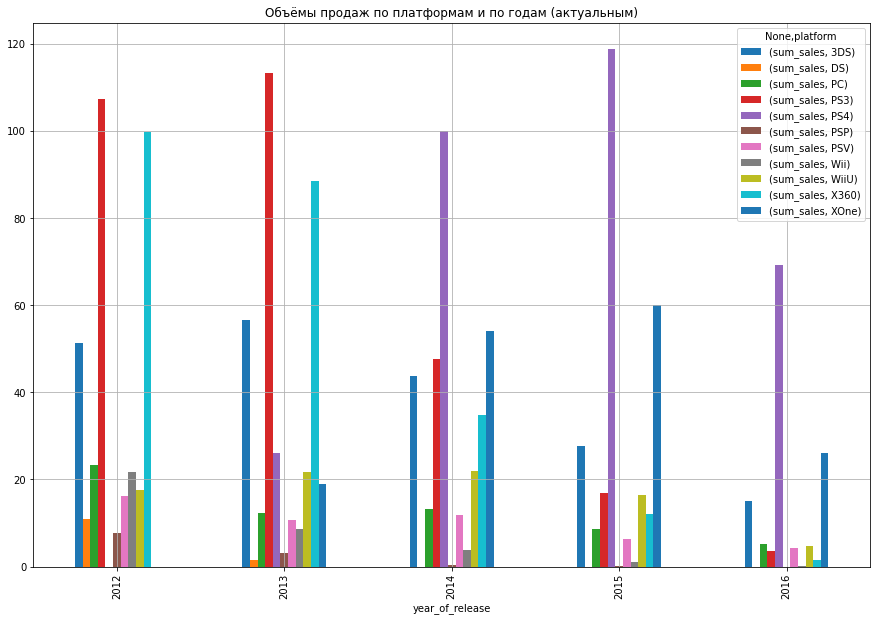

In [17]:
act_games_by_platforms = act_data.pivot_table(
    index = ['year_of_release','platform'],
    values = 'sum_sales',
    aggfunc = 'sum'
)

print(act_games_by_platforms)

act_games_by_platforms.unstack().plot(kind='bar',
    title = 'Объёмы продаж по платформам и по годам (актуальным)',
    label='Сумма продаж, миллионов копий',
    grid=True,
    legend=True,
    figsize=(15,10)
)

При фильтрации у нас осталось всего лишь 11 платформ (и то не каждый год есть продажи). ***важное уточнение: продажи за 2016 год по всем платформам меньше, чем за 2015, будем рассматривать данимаку с учёётом этого***  В источнике веротно не все данные по году (такое резкое снижение по всем платформам весьма маловероятно). По динамике платформ видно следующее:
- Совсем исчезли платформы DS, PSP, Wii
- Сильно снизились продажи по PS3, X360
- Снижаются продажи 3DS, PC, PSV, WiiU
- Повышаются продажи PS4, XOne
- Топ 3 платформы по продажа за 2016 (с большим отрывом от других) - это PS4, XOne и 3DS

**Ставку будем делать на PS4, XOne и 3DS**

In [18]:
data_PS4 = act_data.query('platform == "PS4"')
# print(data_PS4.head())
data_XOne = act_data.query('platform == "XOne"')
# print(data_XOne.head())
data_3DS = act_data.query('platform == "3DS"')
# print(data_3DS.head())

Создали срезы под каждую платформу, которая потенциально интересна

### "Ящик с усами" по глобальным продажам в разбивке по платформам

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

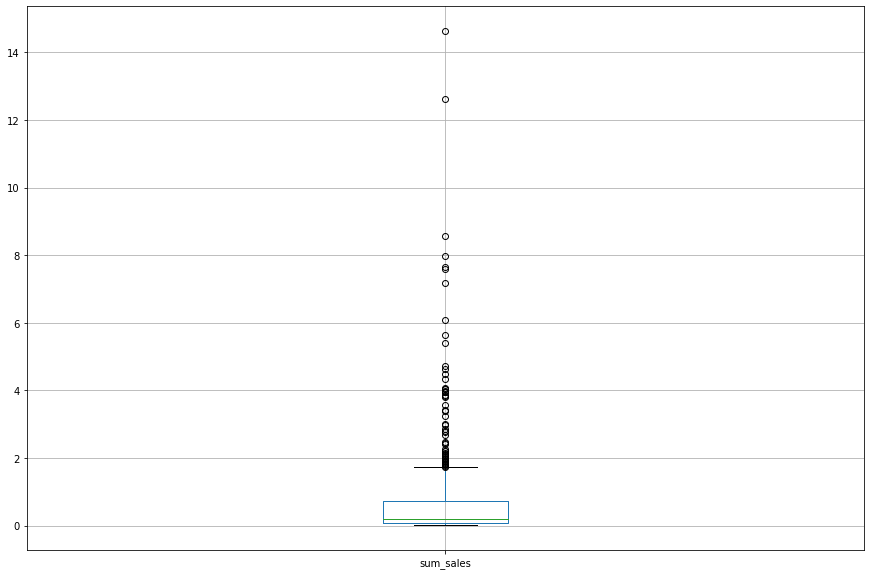

In [19]:
data_PS4.boxplot(column = 'sum_sales', figsize = (15, 10))
data_PS4['sum_sales'].describe()

На платформе PS4 средняя игра в год продается 0,8 миллионов копий (это просто дополнительно, на boxplot нет такого). 50% игр при это продаются меньше 0,2 миллиона копий, 75% до 0,73 миллионов, а 25% и вовсе меньше 0.06 миллионов. При этом количество хитов (выбивающихся из общей массы) достаточно велико, верхняя граница статистически значимых значений до выборки (0,73 + 1,5*(0,73-0,06)= 1,735 миллионов копий. А максимальное значение равно 14,63 миллиона копий.

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

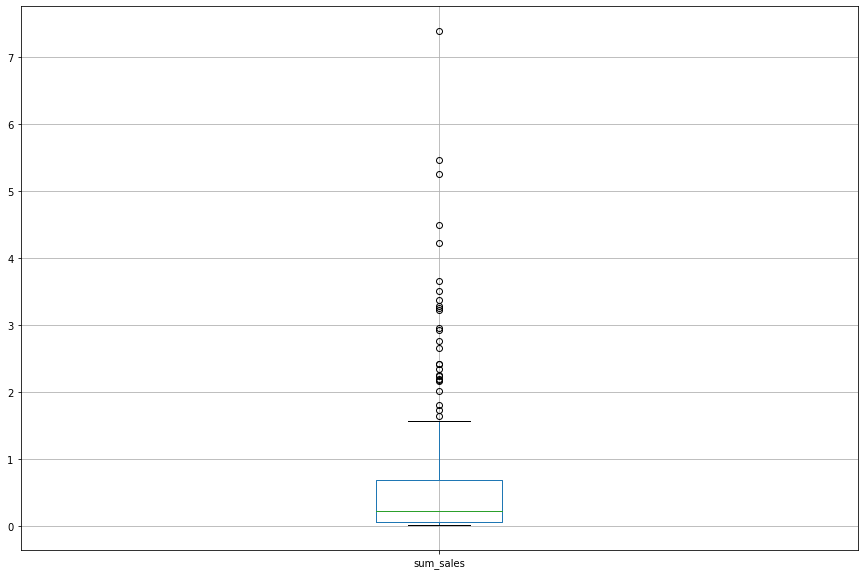

In [20]:
data_XOne.boxplot(column = 'sum_sales', figsize = (15, 10))
data_XOne['sum_sales'].describe()

На платформе XOne средняя игра в год продается 0,64 миллионов копий (это просто дополнительно, на boxplot нет такого). 50% игр при это продаются меньше 0,22 миллиона копий, 75% до 0,685 миллионов, а 25% и вовсе меньше 0,06 миллионов. При этом количество хитов (выбивающихся из общей массы) достаточно велико, верхняя граница статистически значимых значений до выборки (0,685 + 1,5*(0,685-0,06)= 1,622 миллионов копий. А максимальное значение равно 7,39 миллионов копий.

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

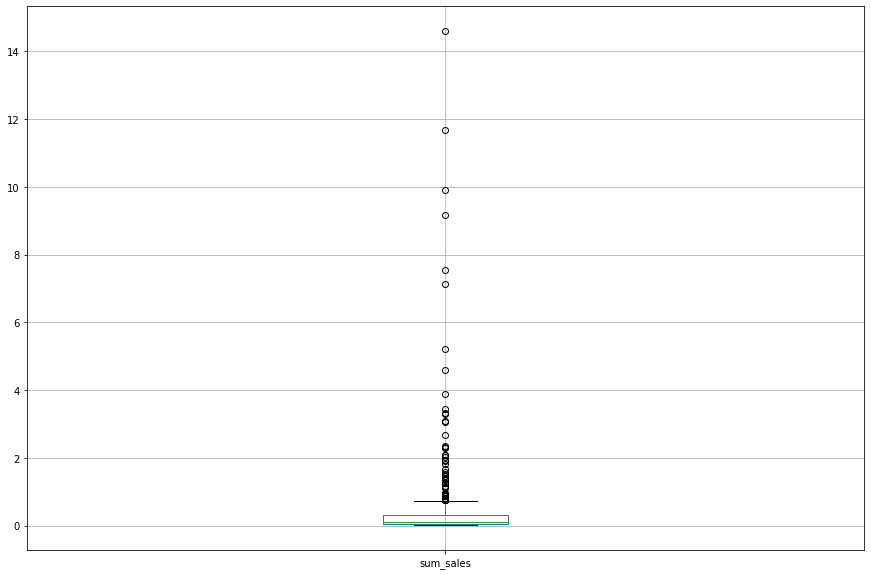

In [21]:
data_3DS.boxplot(column = 'sum_sales', figsize = (15, 10))
data_3DS['sum_sales'].describe()

На платформе PS4 средняя игра в год продается 0,49 миллионов копий (это просто дополнительно, на boxplot нет такого). 50% игр при это продаются меньше 0,11 миллиона копий, 75% до 0,312 миллионов, а 25% и вовсе меньше 0.04 миллионов. При этом количество хитов (выбивающихся из общей массы) достаточно велико, верхняя граница статистически значимых значений до выборки (0,312 + 1,5*(0,312-0,04)= 0,72 миллионов копий. А максимальное значение равно 14,6 миллиона копий.

**На каждой платформе есть много хитов, что выделяются выбросами из общей средней массы. При этом PS4 и XOne схожие платформы по продажам, а на 3DS игры продаются в среднем меньшими тиражами**

**На одном графике**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


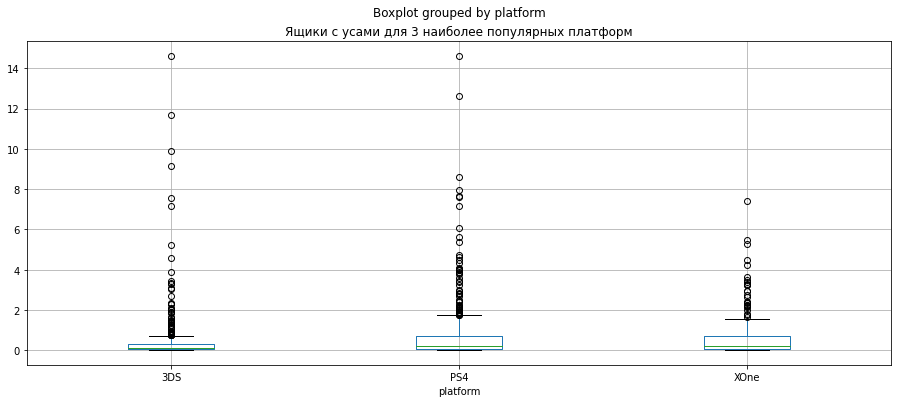

In [22]:
act_data.query('platform in ["PS4", "XOne", "3DS"]').boxplot(column = 'sum_sales', by = 'platform', figsize = (15, 6))
plt.title('Ящики с усами для 3 наиболее популярных платформ')
plt.show()

**На одном графике, усеченно**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


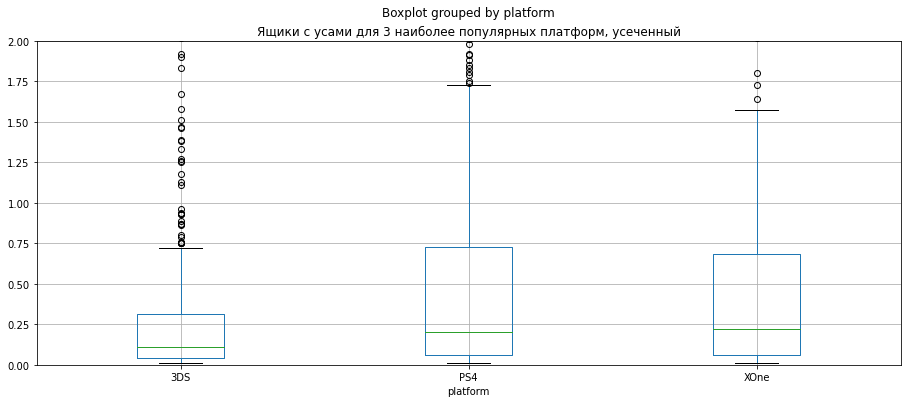

In [23]:
act_data.query('platform in ["PS4", "XOne", "3DS"]').boxplot(column = 'sum_sales', by = 'platform', figsize = (15, 6))
plt.ylim (0, 2)
plt.title('Ящики с усами для 3 наиболее популярных платформ, усеченный')
plt.show()

### Анализ корреляции отзывов и продаж в рамках одной платформы

Коэффциент корреляции Пирсона между отзывами критиков и продажами на платформе PS4 равен 0.41



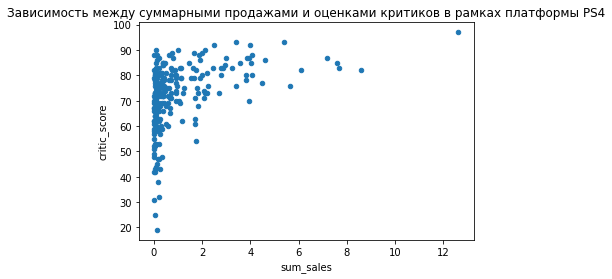

In [24]:
print('Коэффциент корреляции Пирсона между отзывами критиков и продажами на платформе PS4 равен {:.2f}'.format(data_PS4[data_PS4['critic_score'] != 0]['sum_sales'].corr(data_PS4[data_PS4['critic_score'] != 0]['critic_score'])))
print()

data_PS4[data_PS4['critic_score'] != 0].plot(x='sum_sales', y='critic_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками критиков в рамках платформы PS4")
plt.show()

**Существует средняя по силе зависимость между оценками критиков и продажами.** При этом видно, что игры с большими продажами все же получали хорошие оценки в свое большинстве (особенно заметно после 60 баллов). 

Коэффциент корреляции Пирсона между отзывами пользователей и продажами на платформе PS4 равен -0.03



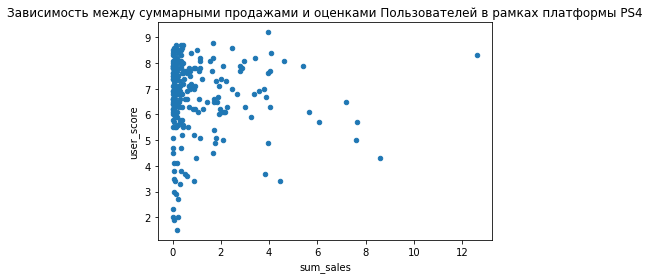

In [25]:
print('Коэффциент корреляции Пирсона между отзывами пользователей и продажами на платформе PS4 равен {:.2f}'.format(data_PS4[(data_PS4['user_score'] != 0) & (data_PS4['user_score'] != 100)]['sum_sales'].corr(data_PS4[(data_PS4['user_score'] != 0) & (data_PS4['user_score'] != 100)]['user_score'])))
print()

data_PS4[(data_PS4['user_score'] != 0) & (data_PS4['user_score'] != 100)].plot(x='sum_sales', y='user_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками Пользователей в рамках платформы PS4")
plt.show()

**Зависимости между оценками пользователей и продажами нет.** Игра может получать и хорошие и плохие отзывы, но невозможно предсказать её продажи по этому параметру!

### Анализ корреляции Отзывов с продажами по другим платформам

Коэффциент корреляции Пирсона между отзывами критиков и продажами на актуальных платормах (без учета PS4) равен 0.28



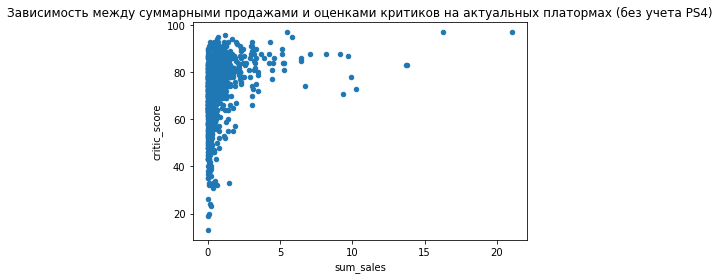

In [26]:
# print(act_data.head())

print('Коэффциент корреляции Пирсона между отзывами критиков и продажами на актуальных платормах (без учета PS4) равен {:.2f}'.format(act_data[(act_data['critic_score'] != 0) & (act_data['platform'] != 'PS4')]['sum_sales'].corr(act_data[(act_data['critic_score'] != 0) & (act_data['platform'] != 'PS4')]['critic_score'])))
print()

act_data[(act_data['critic_score'] != 0) & (act_data['platform'] != 'PS4')].plot(x='sum_sales', y='critic_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками критиков на актуальных платормах (без учета PS4)")
plt.show()

**Существует слабая (меньше, чем на PS4) по силе зависимость между оценками критиков и продажами на актуальных платформах без учета PS4.** При этом видно, что игры с большими продажами все же получали хорошие оценки в свое большинстве (особенно заметно после 60 баллов). 

Коэффциент корреляции Пирсона между отзывами пользователей и продажами на актуальных платормах (без учета PS4) равен 0.01



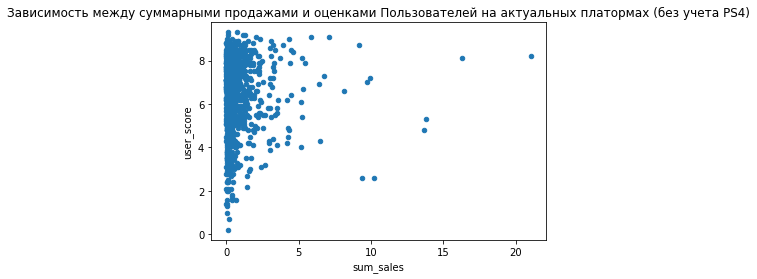

In [27]:
print('Коэффциент корреляции Пирсона между отзывами пользователей и продажами на актуальных платормах (без учета PS4) равен {:.2f}'.format(act_data[(act_data['user_score'] != 0) & (act_data['user_score'] != 100) & (act_data['platform'] != 'PS4')]['sum_sales'].corr(act_data[(act_data['user_score'] != 0) & (act_data['user_score'] != 100) & (act_data['platform'] != 'PS4')]['user_score'])))
print()

act_data[(act_data['user_score'] != 0) & (act_data['user_score'] != 100) & (act_data['platform'] != 'PS4')].plot(x='sum_sales', y='user_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками Пользователей на актуальных платормах (без учета PS4)")
plt.show()

**Зависимости между оценками пользователей и продажами нет (также как и на PS4).** Игра может получать и хорошие и плохие отзывы, но невозможно предсказать её продажи по этому параметру!

Коэффциент корреляции Пирсона между отзывами критиков и продажами на XOne равен 0.42



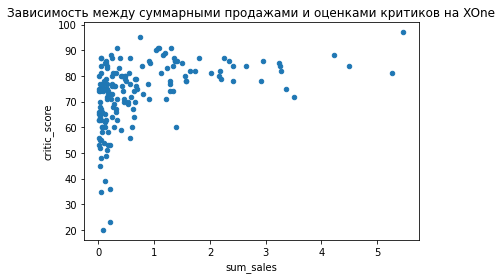

Коэффциент корреляции Пирсона между отзывами критиков и продажами на 3DS равен 0.32



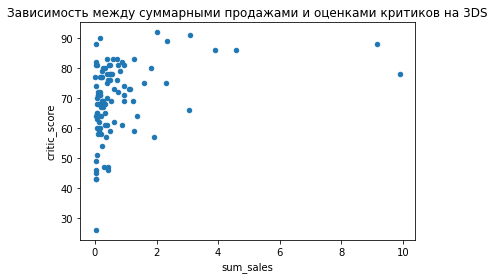

In [28]:
critic_act_data = act_data[act_data['critic_score'] != 0]

print('Коэффциент корреляции Пирсона между отзывами критиков и продажами на XOne равен {:.2f}'.format(
critic_act_data[critic_act_data['platform'] == 'XOne']['sum_sales'].corr(critic_act_data[critic_act_data['platform'] == 'XOne']['critic_score'])))
print()

critic_act_data[critic_act_data['platform'] == 'XOne'].plot(x='sum_sales', y='critic_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками критиков на XOne")
plt.show()

print('Коэффциент корреляции Пирсона между отзывами критиков и продажами на 3DS равен {:.2f}'.format(
critic_act_data[critic_act_data['platform'] == '3DS']['sum_sales'].corr(critic_act_data[critic_act_data['platform'] == '3DS']['critic_score'])))
print()

critic_act_data[critic_act_data['platform'] == '3DS'].plot(x='sum_sales', y='critic_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками критиков на 3DS")
plt.show()

На XOne зависимость между оценками критиков и продажами средняя как и у PS4, у 3DS корреляция слабее.

Коэффциент корреляции Пирсона между отзывами пользователей и продажами на XOne равен -0.07



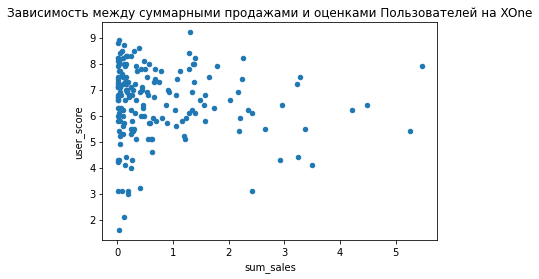

Коэффциент корреляции Пирсона между отзывами пользователей и продажами на 3DS равен 0.20



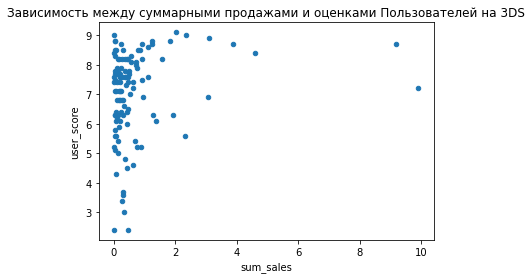

In [29]:
user_act_data = act_data[(act_data['user_score'] != 0) & (act_data['user_score'] != 100)]

print('Коэффциент корреляции Пирсона между отзывами пользователей и продажами на XOne равен {:.2f}'.format(
user_act_data[user_act_data['platform'] == 'XOne']['sum_sales'].corr(user_act_data[user_act_data['platform'] == 'XOne']['user_score'])))
print()

user_act_data[user_act_data['platform'] == 'XOne'].plot(x='sum_sales', y='user_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками Пользователей на XOne")
plt.show()

print('Коэффциент корреляции Пирсона между отзывами пользователей и продажами на 3DS равен {:.2f}'.format(
user_act_data[user_act_data['platform'] == '3DS']['sum_sales'].corr(user_act_data[user_act_data['platform'] == '3DS']['user_score'])))
print()

user_act_data[user_act_data['platform'] == '3DS'].plot(x='sum_sales', y='user_score', kind='scatter',
title = "Зависимость между суммарными продажами и оценками Пользователей на 3DS")
plt.show()

На платформе 3DS слабая корреляция между оценками пользователей и продажами существует, на XOne также нет

### Анализ распределения игр по жанрам, прибыльности по жанрам

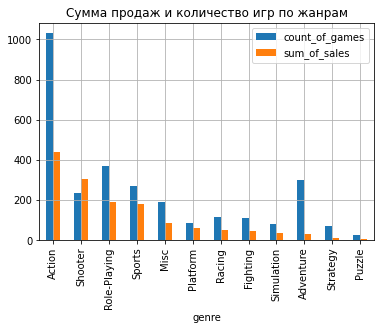

              count_of_games  sum_of_sales  sales_by_game
genre                                                    
Shooter                  235        304.73       1.296723
Platform                  85         61.00       0.717647
Sports                   268        181.07       0.675634
Role-Playing             370        192.80       0.521081
Racing                   115         53.50       0.465217
Misc                     192         85.04       0.442917
Simulation                80         35.12       0.439000
Action                  1031        441.12       0.427856
Fighting                 109         44.49       0.408165
Strategy                  71         13.34       0.187887
Puzzle                    28          4.89       0.174643
Adventure                302         29.43       0.097450



In [30]:
games_genre = act_data.pivot_table(
    index = 'genre',
    values = 'sum_sales',
    aggfunc = ('sum', 'count')
).sort_values('sum', ascending = False)

games_genre.columns = ['count_of_games', 'sum_of_sales']

games_genre.plot(kind='bar',
    title = 'Сумма продаж и количество игр по жанрам',
    label='Сумма продаж, миллионов копий',
    grid=True,
    legend=True
)
plt.show()

games_genre['sales_by_game'] = games_genre['sum_of_sales'] / games_genre['count_of_games']

print(games_genre.sort_values('sales_by_game', ascending = False))
print()

Самые высокие продажи (с большим отрывом) у Action (441,2 миллиона штук), также большие продажи у Shooter (304,73) и у Role-Playing (192,8) и Sports (181,7). Следующий жанр Misc (возможно в них часть принадлежит "большим" жанрам) идёт с разрывом более чем в 2 раза (85,04)! Самые маленькие продажи у Puzzle (4,89) и Strategy (13,34).

При этом количество игр по жанрам не всегда соответствуют распределению по продажам! Наибольшее количество игр в Action (1031), а далее идут Role-Playing (370), Adventure (302), Sports (268), Shooter (235). Из-за этого прибыльность/количество продаж на одну игру сильно различается.

**Самые прибыльные игры с большим отрывом в жанре Shooter (1,3 миллиона штук на игры в среднем), а также Platform (0,7) и Sports (0,67).**


## Портреты пользователей каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

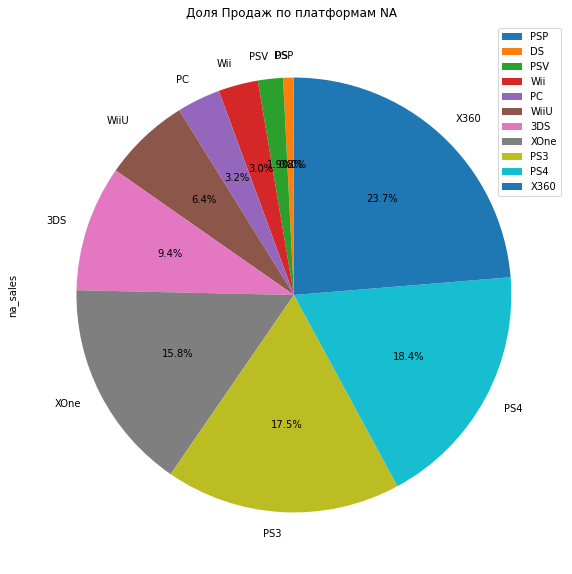

          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31
WiiU         38.10
PC           19.12
Wii          17.45
PSV          10.98
DS            4.59
PSP           0.13


In [31]:
NA_act_data = act_data.pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum'
)

NA_act_data.sort_values('na_sales').plot(title = 'Доля Продаж по платформам NA ', y = 'na_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(NA_act_data.sort_values('na_sales', ascending = False))

***В NA регионе первое место прочно занимает X360 c 23,7% продаж, за ним идут PS4 и PS3 (18,4% и 17,5%), XOne (15,8%) и замыкает пятерку 3DS (9,4%)***

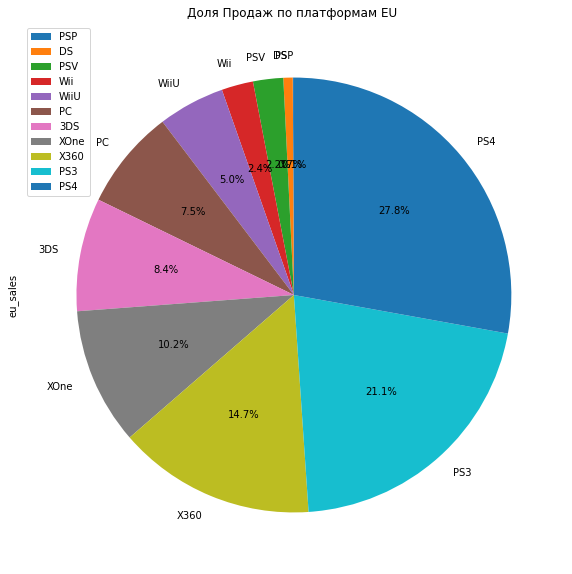

          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
PC           37.76
WiiU         25.13
Wii          11.92
PSV          11.36
DS            3.53
PSP           0.42


In [32]:
EU_act_data = act_data.pivot_table(
    index = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum'
)

EU_act_data.sort_values('eu_sales').plot(title = 'Доля Продаж по платформам EU ', y = 'eu_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(EU_act_data.sort_values('eu_sales', ascending = False))

***В EU регионе первое место прочно занимает PS4 c 27,8% продаж, за ним PS3 (21,1%), далее X360 и XOne (14,7% и 10,2%) и замыкает пятерку 3DS (8,4%)***

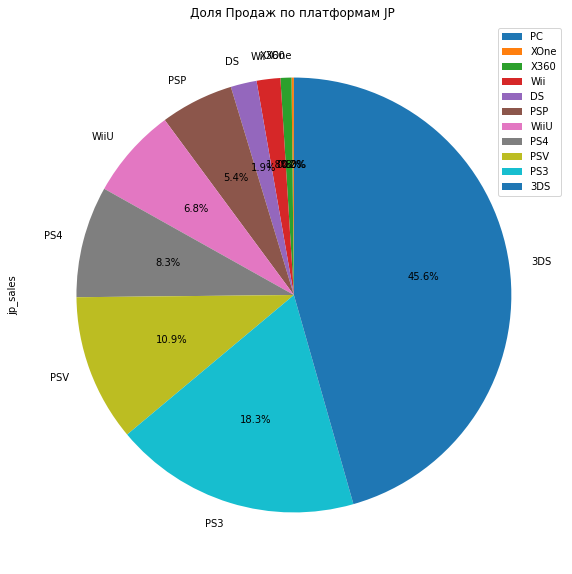

          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01
PSP          10.47
DS            3.72
Wii           3.39
X360          1.57
XOne          0.34
PC            0.00


In [33]:
JP_act_data = act_data.pivot_table(
    index = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum'
)

JP_act_data.sort_values('jp_sales').plot(title = 'Доля Продаж по платформам JP ', y = 'jp_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(JP_act_data.sort_values('jp_sales', ascending = False))

***В JP регионе первое место занимает 3DS с почти половиной продаж (47,5%), за ним PS3 (18,3%), далее PSV и PS4 (10,9% и 8,3%) и замыкает пятерку WiiU (6,8%)***

**Регионы очень сильно различаются по топу популярных платформ. В Америке наиболее популярен XBOX, хотя PS наступает на пятки, а в Европе наоборот (хотя в каждом регионе топ 5 и 3DS). При этом в Японии наиболее популярны портативные варианты, поэтому почти половину рынка составляет 3DS, а портативная PS на третье месте среди своих обычных версий и топ 5 - это портативная WiiU**

### Самые популярные жанры (топ-5). Поясните разницу.

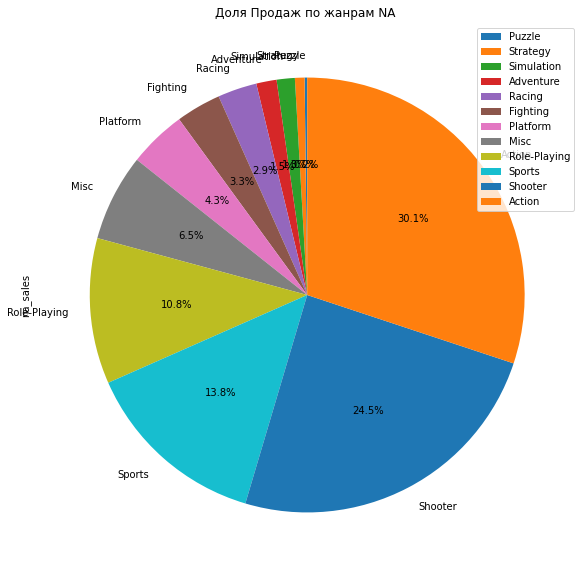

              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13


In [34]:
NA_act_data = act_data.pivot_table(
    index = 'genre',
    values = 'na_sales',
    aggfunc = 'sum'
)

NA_act_data.sort_values('na_sales').plot(title = 'Доля Продаж по жанрам NA ', y = 'na_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(NA_act_data.sort_values('na_sales', ascending = False))

В NA регионе по жанрам следующее распределение:
- Action (30,1%)
- Shooter (24,5%)
- Sports (13,8%)
- Role-Playing (10,8%)
- Misc (6,5%)

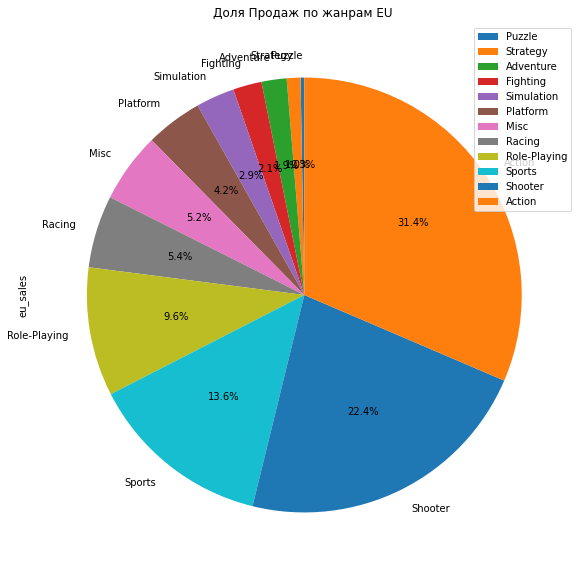

              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40


In [35]:
EU_act_data = act_data.pivot_table(
    index = 'genre',
    values = 'eu_sales',
    aggfunc = 'sum'
)

EU_act_data.sort_values('eu_sales').plot(title = 'Доля Продаж по жанрам EU ', y = 'eu_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(EU_act_data.sort_values('eu_sales', ascending = False))

В EU регионе по жанрам следующее распределение:
- Action (31,4%)
- Shooter (22,4%)
- Sports (13,6%)
- Role-Playing (9,6%)
- Racing (5,4%)

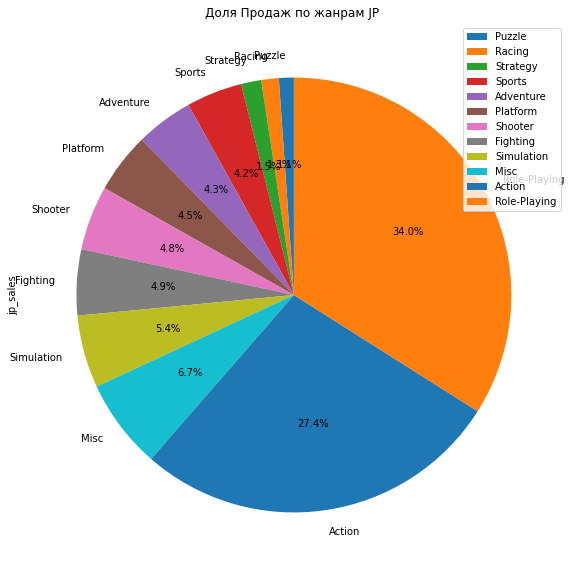

              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44
Shooter           9.23
Platform          8.63
Adventure         8.24
Sports            8.01
Strategy          2.88
Racing            2.50
Puzzle            2.14


In [36]:
JP_act_data = act_data.pivot_table(
    index = 'genre',
    values = 'jp_sales',
    aggfunc = 'sum'
)

JP_act_data.sort_values('jp_sales').plot(title = 'Доля Продаж по жанрам JP ', y = 'jp_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(JP_act_data.sort_values('jp_sales', ascending = False))

В JP регионе по жанрам следующее распределение:
- Role-Playing (34%)
- Action (27,4%)
- Misc (6,7%)
- Simulation (5,4%)
- Fighting (4,9%)

**По жанрам почти одинаковая ситуация в Америке и Европе: самый популярный Экшен, далее Шутеры, Спортивные и РПГ (меняется только интерес к гонкам, в Европе это пятое место, а шестое Смешанные, которые занимают 5 место в Америке). При этом рынок Японии сильно отличается и по жанрам: почти треть занимают РПГ, далее Экшен и после с большим отрывом Смешанные, Симуляции и Драки.**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

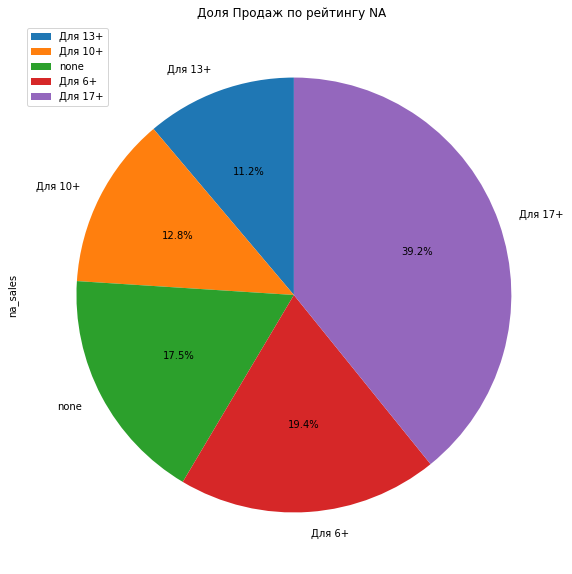

         na_sales
rating           
Для 17+    231.57
Для 6+     114.37
none       103.31
Для 10+     75.70
Для 13+     66.02


In [37]:
NA_act_data = act_data.pivot_table(
    index = 'rating',
    values = 'na_sales',
    aggfunc = 'sum'
)

NA_act_data.sort_values('na_sales').plot(title = 'Доля Продаж по рейтингу NA ', y = 'na_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(NA_act_data.sort_values('na_sales', ascending = False))

В NA наиболее популярен рейтинг 17+ (39,2% продаж) и пятая часть (19,4%) приходится на 6+. Игры без рейтинга на третьем месте 17,5%

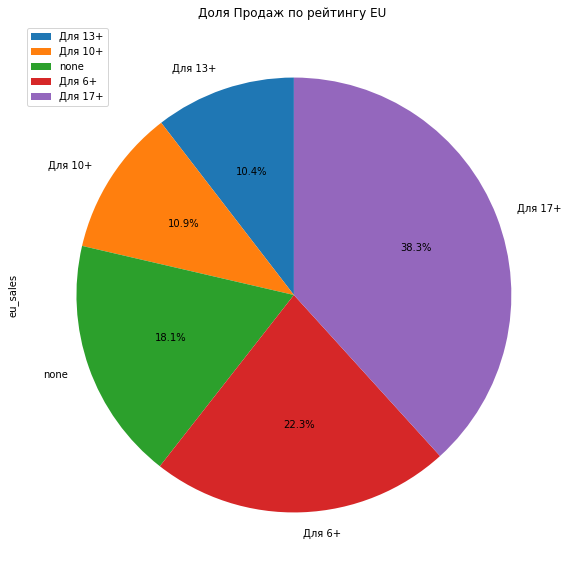

         eu_sales
rating           
Для 17+    193.96
Для 6+     113.03
none        91.50
Для 10+     55.37
Для 13+     52.96


In [38]:
EU_act_data = act_data.pivot_table(
    index = 'rating',
    values = 'eu_sales',
    aggfunc = 'sum'
)

EU_act_data.sort_values('eu_sales').plot(title = 'Доля Продаж по рейтингу EU ', y = 'eu_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(EU_act_data.sort_values('eu_sales', ascending = False))

В NA наиболее популярен рейтинг 17+ (38,3% продаж) и 22,3% приходится на 6+. Игры без рейтинга на третьем месте 18,1%.

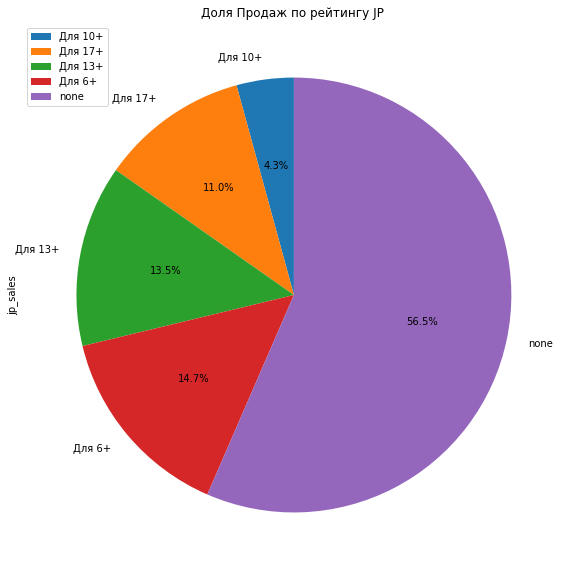

         jp_sales
rating           
none       108.84
Для 6+      28.33
Для 13+     26.02
Для 17+     21.20
Для 10+      8.19


In [39]:
JP_act_data = act_data.pivot_table(
    index = 'rating',
    values = 'jp_sales',
    aggfunc = 'sum'
)

JP_act_data.sort_values('jp_sales').plot(title = 'Доля Продаж по рейтингу JP ', y = 'jp_sales', kind='pie', startangle=90, legend = True, figsize=(10, 10), autopct='%1.1f%%')
plt.show()

print(JP_act_data.sort_values('jp_sales', ascending = False))

В JP больше половины приходится на игры без рейтинга (вероятно рейтинги не ставятся на игры в стране), вторые по популярности 6+ (14,7%)

**В Америке и Европе почти идентичная ситуация по рейтингам: около 40% занимает взрослый рейтинг 17+ и около 20% на 6+ и около 18% на игры без рейтинга. В Японии абсолютно большинство занимают игры без рейтинга (56,5%) и на следующих местах игры с "детским рейтингом".

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для изучения одинаковы ли пользовательские райтинги XOne и PC сформулируем нулевую гипотезу о равенстве "Пользовательские рейтинги XOne и PC равны" и альтернативную "Пользовательские рейтинги XOne и PC различаются" (нам не важно в какую сторону они отличаются). Применим t-критерий для оценки

In [40]:
# act_data.info()

alpha = 0.05

first_results = st.ttest_ind(act_data[(act_data['platform'] == 'XOne') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'], act_data[(act_data['platform'] == 'PC') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'], equal_var = False)

if first_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, потому что p={:.2f}'.format(first_results.pvalue))
else:
    print('Не отвергаем нулевую гипотезу, потому что p={:.2f}'.format(first_results.pvalue))

print()    
print('Средний пользовательский рейтинг на XOne: {:.1f}'.format(act_data[(act_data['platform'] == 'XOne') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'].mean()))
print()
print('Средний пользовательский рейтинг на PC: {:.1f}'.format(act_data[(act_data['platform'] == 'PC') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'].mean()))

Не отвергаем нулевую гипотезу, потому что p=0.55

Средний пользовательский рейтинг на XOne: 6.5

Средний пользовательский рейтинг на PC: 6.4


Не удалось отвергнуть нулевую гипотезу, а это значит, что **Средний пользовательский рейтинг на Xbox One и PC отличается, но с вероятностью 55% такое различие можно получить случайно.**

### Средние пользовательские рейтинги жанров Action и Sports разные.

Для изучения разные ли пользовательские рейтинги жанров Action и Sports сформулируем нулевую гипотезу о равенстве "Пользовательские рейтинги жанров Action и Sports равны" и альтернативную "Пользовательские рейтинги жанров Action и Sports различаются" (нам не важно в какую сторону они отличаются). Применим t-критерий для оценки

In [41]:
# act_data.info()

alpha = 0.05

second_results = st.ttest_ind(act_data[(act_data['genre'] == 'Action') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'], act_data[(act_data['genre'] == 'Sports') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'], equal_var = False)

if second_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, потому что p={:.2f}'.format(second_results.pvalue))
else:
    print('Не отвергаем нулевую гипотезу, потому что p={:.2f}'.format(second_results.pvalue))

print()    
print('Средний пользовательский рейтинг в жанре Action: {:.1f}'.format(act_data[(act_data['genre'] == 'Action') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'].mean()))
print()
print('Средний пользовательский рейтинг в жанре Sports: {:.1f}'.format(act_data[(act_data['genre'] == 'Sports') & (act_data['user_score'] != 0) & (act_data['user_score'] != 100)]['user_score'].mean()))

Отвергаем нулевую гипотезу, потому что p=0.00

Средний пользовательский рейтинг в жанре Action: 6.8

Средний пользовательский рейтинг в жанре Sports: 5.5


Отвергаем нулевую гипотезу, а это значит, что **Средние пользовательские рейтинги в жанре Action и Sports отличаются.**

## Общий вывод

Исходя из изначальной задачи узнать определяющие успешность игр закономерности и получить рекомендации для "Ставок" на потенциально популярные продукты можно сказать о следующем:
- **Наибольшую ставку нужно делать на платформу PS4, игры в жанре Шутеры, с высокими оценками критиков, не отталкиваясь от оценок пользователей с рейтингом 17+.**
    - Также стоит смотреть на игры на Xbox One (особенно для американского рынка) и на платформе 3DS (особенно для японского рынка), жанрах Action и РПГ (особенно для Японского рынка), рейтинге 6+ и без рейтинга (для Японского рынка).

Подробнее о выявленных интересных подробностях:
- Сейчас на рынке игр плато и даже небольшой спад (в сравнении с 2007-2011 годом)ж
- Жизненный цикл платформ 8-10 лет, становление 2-4 года;
- Наиболее ёмкие платформы на текущий момент - это PS4, XOne и 3DS (первые 2 еще растут, последняя на закате);
- Средние продажи на 3DS ниже, чем на PS4 и XOne;
- На каждой из платформ есть хиты, чьи продажи сильно выходят за среднее (выбросы);
- Отзывы пользователей не коррелируют с успешными продажами;
- Отзывы критиков коррелируют с успешностью продаж (особенно на платформе PS4);
- Самые высокие продажи в объёме у Экшен игр, самые прибыльные в среднем Шутеры;
- В Америке больше любят Xbox, в Европе PS, а в Японии 3DS и мобильные форматы в целом;
- Америка и Европа схожие регионы по жанрам (самые попуярные Экшен и Шутеры), в Японии самые популярные РПГ, а далее Экшен;
- В Америке и Европе почти половину продаж занимает взрослый рейтинг 17+. В Японии проявляют больший интерес к "детским" рейтингам по трети занимает 6+ и 13+;
- Пользовательские рейтинги на XBox и PC схожи;
- Пользовательские рейтинги в жанрах Экшен и Спорт различаются.